In [ ]:
import pandas as pd

In [ ]:
songs = pd.read_csv('/content/songs_normalize.csv')

In [ ]:
songs.sample(8)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1560,Birdy,Let It All Go,280757,False,2015,68,0.383,0.430,10,-8.644,1,0.0302,0.81700,0.000001,0.0869,0.1740,107.005,pop
816,Kanye West,Flashing Lights,237506,True,2007,52,0.639,0.628,6,-7.578,0,0.0399,0.03810,0.000000,0.3860,0.4300,90.482,hip hop
1225,Olly Murs,Troublemaker (feat. Flo Rida),185586,False,2012,0,0.762,0.863,0,-3.689,0,0.0565,0.01500,0.000000,0.1250,0.9650,106.008,"pop, Dance/Electronic"
1430,DJ Snake,Turn Down for What,213733,False,2013,70,0.818,0.799,1,-4.100,0,0.1560,0.00107,0.128000,0.0570,0.0815,100.014,"hip hop, pop, Dance/Electronic"
1927,Lil Tecca,Ransom,131240,True,2019,78,0.745,0.642,7,-6.257,0,0.2870,0.02040,0.000000,0.0658,0.2260,179.974,hip hop
501,Mario,Let Me Love You,256733,False,2004,72,0.656,0.578,7,-8.970,0,0.0922,0.23500,0.000000,0.1180,0.5560,94.514,"pop, R&B"
1604,Adele,Hello,295502,False,2015,1,0.471,0.431,5,-6.129,0,0.0342,0.32900,0.000000,0.0854,0.2890,157.980,"pop, R&B"
1582,Flo Rida,"I Don't Like It, I Love It (feat. Robin Thicke...",224258,False,2015,67,0.854,0.766,9,-4.697,0,0.1410,0.02420,0.000000,0.0793,0.7840,118.004,"hip hop, pop"


In [ ]:
songs.shape

(2000, 18)

In [ ]:
songs.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

#### Q1) Using groupby(), plot the number of songs that have been released each year. Please, use the kind='bar', xlabel=year and ylabel ='Count of songs' and the size of figure should be (12,8) ---- <font color='blue'> (15 points)</font>

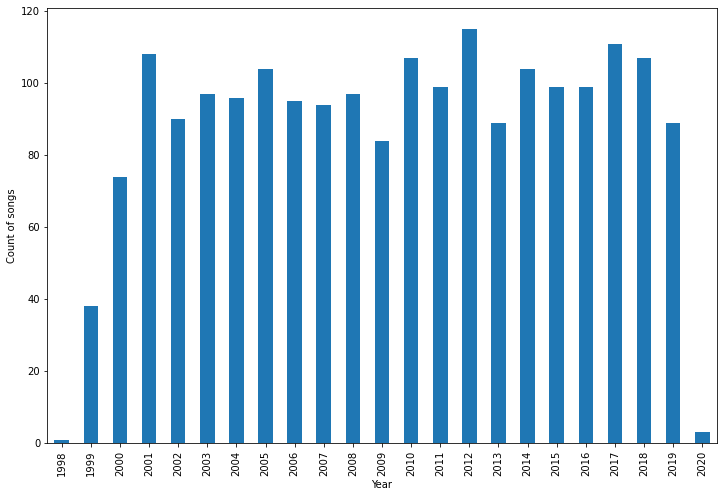

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

songs_per_year = songs.groupby('year').size()

plt.figure(figsize=(12, 8))
songs_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count of songs')
plt.show()


#### Q2) Use groupby() to present how many songs does Rihanna have over years. <font color='blue'> (10 points)</font>

In [ ]:
rihanna_songs = songs[songs['artist'] == 'Rihanna']
rihanna_songs_per_year = rihanna_songs.groupby('year').size()
print(rihanna_songs_per_year)


year
2005    1
2006    2
2008    5
2009    4
2010    5
2011    3
2012    2
2015    1
2016    2
dtype: int64


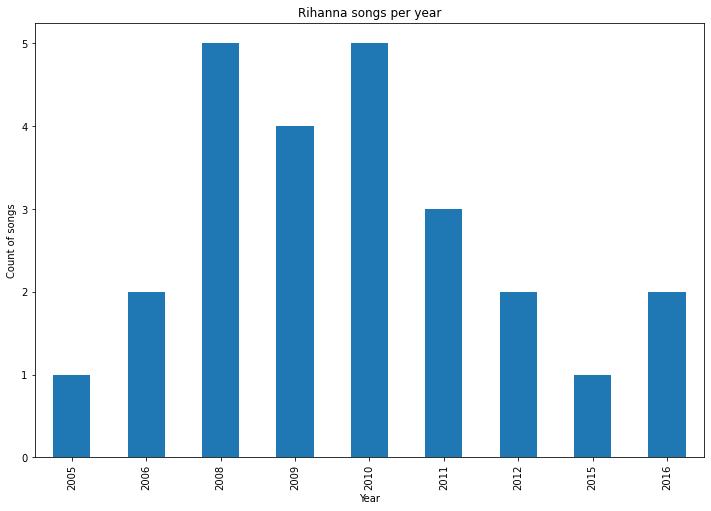

In [ ]:
rihanna_songs = songs[songs['artist'] == 'Rihanna']
rihanna_songs_per_year = rihanna_songs.groupby('year').size()

plt.figure(figsize=(12, 8))
rihanna_songs_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count of songs')
plt.title('Rihanna songs per year')
plt.show()

#### Q3) Use groupby() to sort the number of artists released pop(only!) songs in 2011. <font color='blue'> (10 points)</font>

In [ ]:
pop_songs_2011 = songs[(songs['year'] == 2011) & (songs['genre'] == 'pop')]
pop_songs_by_artist = pop_songs_2011.groupby('artist').size().sort_values(ascending=False)

print(pop_songs_by_artist)


artist
Britney Spears     2
Christina Perri    2
Lady Gaga          2
Avril Lavigne      1
Bruno Mars         1
Charlene Soraia    1
Demi Lovato        1
Gigi D'Agostino    1
Matt Cardle        1
dtype: int64


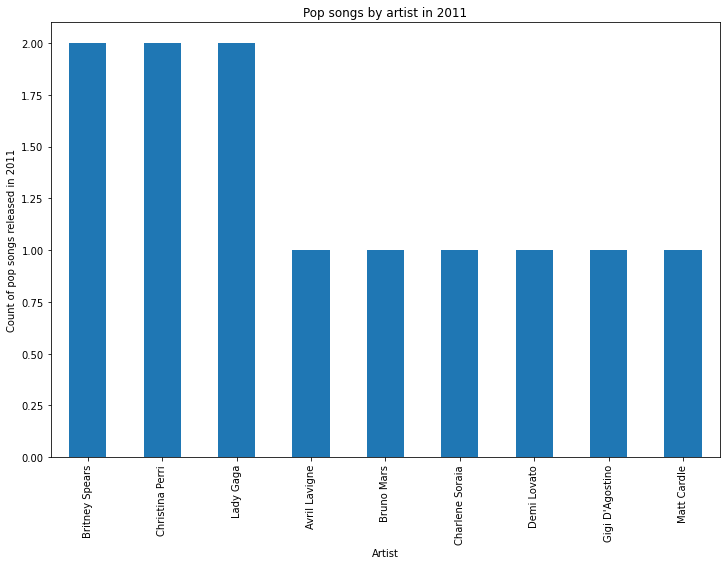

In [ ]:
plt.figure(figsize=(12, 8))
pop_songs_by_artist.plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('Count of pop songs released in 2011')
plt.title('Pop songs by artist in 2011')
plt.show()

#### Q5) List, in order by year, each of the genres in which Calvin Harris has released more than 1 songs. <font color='blue'> (15 points)</font>

In [ ]:
calvin_harris_songs = songs[songs['artist'] == 'Calvin Harris']
calvin_harris_songs_by_year_genre = calvin_harris_songs.groupby(['year', 'genre']).size()

genres_with_more_than_one_song = []
for year in calvin_harris_songs['year'].unique():
    year_data = calvin_harris_songs_by_year_genre[year]
    if year_data is not None:
        year_data = year_data[year_data > 1]
        if len(year_data) > 0:
            genres_with_more_than_one_song += year_data.index.tolist()

genres_with_more_than_one_song = list(set(genres_with_more_than_one_song))
genres_with_more_than_one_song.sort(key=lambda x: songs[songs['genre'] == x]['year'].min())

for genre in genres_with_more_than_one_song:
    count = calvin_harris_songs_by_year_genre[:, genre].sum()
    if count.sum() > 1:
        print(f"{genre}: {count}")
    


hip hop, pop, Dance/Electronic: 20


In [ ]:
calvin_harris_songs = songs[songs['artist'] == 'Calvin Harris']
calvin_harris_songs_by_year_genre = calvin_harris_songs.groupby(['year', 'genre']).size()

genres_with_more_than_one_song = []
for year in calvin_harris_songs['year'].unique():
    year_data = calvin_harris_songs_by_year_genre[year]
    if year_data is not None:
        year_data = year_data[year_data > 1]
        if len(year_data) > 0:
            genres_with_more_than_one_song += year_data.index.tolist()

genres_with_more_than_one_song = list(set(genres_with_more_than_one_song))
genres_with_more_than_one_song.sort(key=lambda x: songs[songs['genre'] == x]['year'].min())

for year in calvin_harris_songs['year'].unique():
    year_data = calvin_harris_songs_by_year_genre[year]
    if year_data is not None:
        count = year_data[genres_with_more_than_one_song].sum()
        if count > 1:
            print(f"{year}: {count}")


2012: 8
2014: 4
2016: 2


#### Q6) <font color='blue'> TOTAL: (50 points)</font>
* Define a new datafame which contains the popularity, danceability, energy, year, tempo, song.  <font color='blue'> (5 points)</font>
* Use transform() to define a new column which represent percantage of popularity (pop%). <font color='blue'> (10 points)</font>
* Set the index of dataframe as year assign new data frame as song_rearranged<font color='blue'> (10 points)</font>
* Describe a new column as 'score' by considering mean of popularity, danceability, energy constants. <font color='blue'> (10 points)</font>
* Then, use groupby() in years and use apply function which returns the sorted values with respect to 'score' column? <font color='blue'> (15 points)</font>
* Display the songs having the first 4 best scores in 2009. Please be sure there is no duplication in the data! <font color='blue'> (10 points)</font>

In [ ]:
# Define a new dataframe
song_data = songs[['popularity', 'danceability', 'energy', 'year', 'tempo', 'song']]
song_data 

,popularity,danceability,energy,year,tempo,song
0,77,0.751,0.834,2000,95.053,Oops!...I Did It Again
1,79,0.434,0.897,1999,148.726,All The Small Things
2,66,0.529,0.496,1999,136.859,Breathe
3,78,0.551,0.913,2000,119.992,It's My Life
4,65,0.614,0.928,2000,172.656,Bye Bye Bye
...,...,...,...,...,...,...
1995,79,0.842,0.734,2019,137.958,Sucker
1996,78,0.552,0.702,2019,169.994,Cruel Summer
1997,69,0.847,0.678,2019,97.984,The Git Up
1998,75,0.741,0.520,2019,102.998,Dancing With A Stranger (with Normani)


In [ ]:
# Define a new column to represent percentage of popularity
song_data['pop%'] = song_data['popularity'].transform(lambda x: (x / x.sum()) * 100)
song_data

<ipython-input-21-7417ad56f7e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_data['pop%'] = song_data['popularity'].transform(lambda x: (x / x.sum()) * 100)


,popularity,danceability,energy,year,tempo,song,pop%
0,77,0.751,0.834,2000,95.053,Oops!...I Did It Again,0.064303
1,79,0.434,0.897,1999,148.726,All The Small Things,0.065974
2,66,0.529,0.496,1999,136.859,Breathe,0.055117
3,78,0.551,0.913,2000,119.992,It's My Life,0.065138
4,65,0.614,0.928,2000,172.656,Bye Bye Bye,0.054282
...,...,...,...,...,...,...,...
1995,79,0.842,0.734,2019,137.958,Sucker,0.065974
1996,78,0.552,0.702,2019,169.994,Cruel Summer,0.065138
1997,69,0.847,0.678,2019,97.984,The Git Up,0.057622
1998,75,0.741,0.520,2019,102.998,Dancing With A Stranger (with Normani),0.062633


In [ ]:
# Set the index of dataframe as year
song_rearranged = song_data.set_index('year')
song_rearranged 


,popularity,danceability,energy,tempo,song,pop%
year,,,,,,
2000,77,0.751,0.834,95.053,Oops!...I Did It Again,0.064303
1999,79,0.434,0.897,148.726,All The Small Things,0.065974
1999,66,0.529,0.496,136.859,Breathe,0.055117
2000,78,0.551,0.913,119.992,It's My Life,0.065138
2000,65,0.614,0.928,172.656,Bye Bye Bye,0.054282
...,...,...,...,...,...,...
2019,79,0.842,0.734,137.958,Sucker,0.065974
2019,78,0.552,0.702,169.994,Cruel Summer,0.065138
2019,69,0.847,0.678,97.984,The Git Up,0.057622


In [25]:
 #Define a new column 'score' by considering mean of popularity, danceability, energy constants
song_rearranged['score'] = (song_rearranged['popularity'] + song_rearranged['danceability'] + song_rearranged['energy']) / 3
song_rearranged

,popularity,danceability,energy,tempo,song,pop%,score
year,,,,,,,
2000,77,0.751,0.834,95.053,Oops!...I Did It Again,0.064303,26.195000
1999,79,0.434,0.897,148.726,All The Small Things,0.065974,26.777000
1999,66,0.529,0.496,136.859,Breathe,0.055117,22.341667
2000,78,0.551,0.913,119.992,It's My Life,0.065138,26.488000
2000,65,0.614,0.928,172.656,Bye Bye Bye,0.054282,22.180667
...,...,...,...,...,...,...,...
2019,79,0.842,0.734,137.958,Sucker,0.065974,26.858667
2019,78,0.552,0.702,169.994,Cruel Summer,0.065138,26.418000
2019,69,0.847,0.678,97.984,The Git Up,0.057622,23.508333


In [26]:
# Use groupby() in years and use apply function which returns the sorted values with respect to 'score' column
year_grouped = song_rearranged.groupby('year').apply(lambda x: x.sort_values('score', ascending=False))
year_grouped 



popularity  danceability  energy    tempo  \
year year                                              
1998 1998          49         0.727   0.445   81.125   
1999 1999          82         0.922   0.909   95.295   
     1999          79         0.924   0.740  133.974   
     1999          79         0.434   0.897  148.726   
     1999          78         0.458   0.795  123.229   
...               ...           ...     ...      ...   
2019 2019           0         0.894   0.511  120.080   
     2019           0         0.641   0.720   92.988   
2020 2020          57         0.836   0.621  101.993   
     2020          39         0.527   0.834  179.920   
     2020          34         0.873   0.900  102.516   

                                           song      pop%      score  
year year                                                             
1998 1998                              Hot Boyz  0.040920  16.724000  
1999 1999                      The Next Episode  0.068479  27.943667  
     1999                      Forgot About Dre  0.065974  26.888000  
     1999                  All The Small Things  0.065974  26.777000  
     1999                             Otherside  0.065138  26.417667  
...                                         ...       ...        ...  
2019 2019  Shotta Flow (feat. Blueface) [Remix]  0.000000   0.468333  
     2019                         Rock The Boat  0.000000   0.453667  
2020 2020                               Options  0.047601  19.485667  
     2020               All The Things She Said  0.032569  13.453667  
     2020                                Switch  0.028394  11.924333  

[2000 rows x 7 columns]

In [27]:
# Display the songs having the first 4 best scores in 2009. Please be sure there is no duplication in the data!
year_grouped.loc[2009].drop_duplicates(subset=['score']).head(4)

,popularity,danceability,energy,tempo,song,pop%,score
year,,,,,,,
2009,82,0.491,0.956,173.585,Empire State Of Mind,0.068479,27.815667
2009,80,0.696,0.921,119.001,Bad Romance,0.066809,27.205667
2009,80,0.743,0.766,127.960,I Gotta Feeling,0.066809,27.169667
2009,79,0.652,0.698,96.021,Party In The U.S.A.,0.065974,26.783333
